In [87]:
from diffusion.heston_process import simulate_heston
from pricing.option_heston import option_heston
from pricing.option_bsm import option_european_bsm
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rc("savefig", dpi=200)
%config InlineBackend.figure_format = 'svg'



In [88]:
# Setting evaluation date
today = ql.Date(7,4,2015)

no_of_timestep = 100
N=1000
maturity = 2

df_spot, df_vol = simulate_heston(today=ql.Date(1, 7, 2020), timestep=no_of_timestep, length=maturity, N=N, 
                                  spot=100, rate=0.0,
                                  v0=0.01, kappa=1.0, theta=0.04, rho=-0.3, sigma=0.4)

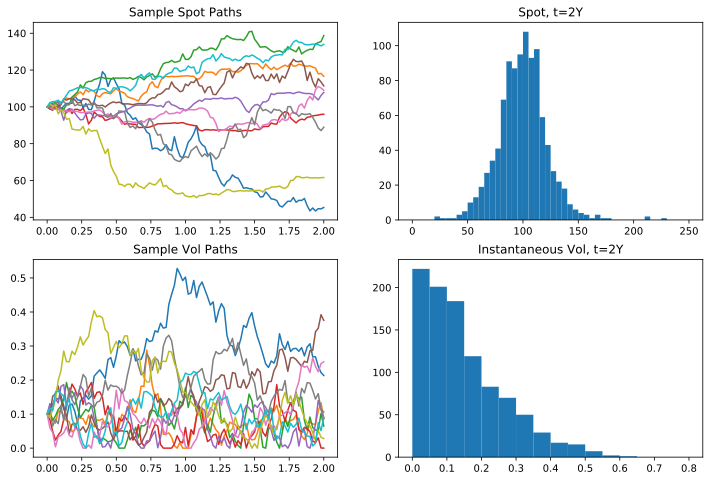

In [89]:

# Plot the first ten paths for spot and vol, and the distribution of the final path step across all paths
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_spot.iloc[0:10].transpose())
plt.title("Sample Spot Paths")

plt.subplot(2, 2, 2)
plt.hist(df_spot[2.0], bins=np.linspace(0, 250, 51))
plt.title("Spot, t=2Y")

plt.subplot(2, 2, 3)
plt.plot(np.sqrt(df_vol.iloc[0:10]).transpose())
plt.title("Sample Vol Paths")

plt.subplot(2, 2, 4)
plt.hist(np.sqrt(df_vol[2.0]), bins=np.linspace(0, 0.8, 17))
plt.title("Instantaneous Vol, t=2Y")

plt.savefig('figures/heston.png')
plt.show()

In [90]:
def customaxis(ax, c_left='k', c_bottom='k', c_right='none', c_top='none',
               lw=3, size=20, pad=8):

    for c_spine, spine in zip([c_left, c_bottom, c_right, c_top],
                              ['left', 'bottom', 'right', 'top']):
        if c_spine != 'none':
            ax.spines[spine].set_color(c_spine)
            ax.spines[spine].set_linewidth(lw)
        else:
            ax.spines[spine].set_color('none')
    if (c_bottom == 'none') & (c_top == 'none'): # no bottom and no top
        ax.xaxis.set_ticks_position('none')
    elif (c_bottom != 'none') & (c_top != 'none'): # bottom and top
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                      color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom != 'none') & (c_top == 'none'): # bottom but not top
        ax.xaxis.set_ticks_position('bottom')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom == 'none') & (c_top != 'none'): # no bottom but top
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_top, labelsize=size, pad=pad)
    if (c_left == 'none') & (c_right == 'none'): # no left and no right
        ax.yaxis.set_ticks_position('none')
    elif (c_left != 'none') & (c_right != 'none'): # left and right
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left != 'none') & (c_right == 'none'): # left but not right
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left == 'none') & (c_right != 'none'): # no left but right
        ax.yaxis.set_ticks_position('right')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_right, labelsize=size, pad=pad)
        
def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward',10)) # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none') # don't draw spine

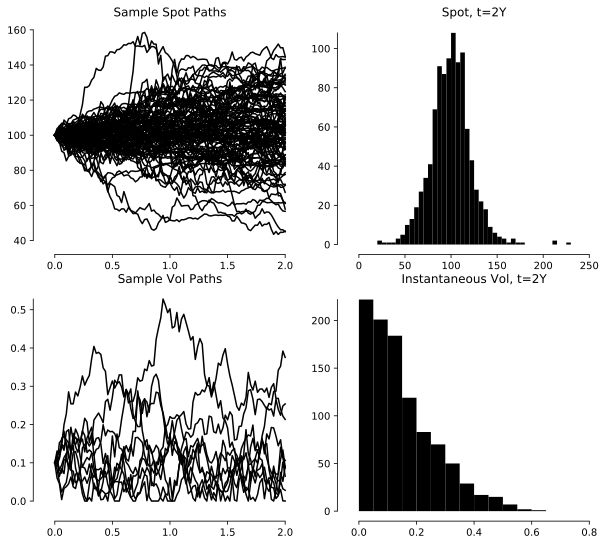

In [91]:
import numpy as np
import matplotlib.pyplot as plt

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(figsize=(10,9), ncols=2, nrows=2)

ax1.plot(df_spot.iloc[0:100].transpose(), 'k')

ax1.set_title('Sample Spot Paths')

ax2.hist(df_spot[2.0], bins=np.linspace(0, 250, 51), color='k')
ax2.set_title('Spot, t=2Y')

ax3.plot(np.sqrt(df_vol.iloc[0:10]).transpose(), color='k')
ax3.set_title('Sample Vol Paths')

ax4.hist(np.sqrt(df_vol[2.0]), bins=np.linspace(0, 0.8, 17), color='k')
ax4.set_title('Instantaneous Vol, t=2Y')

# customaxis(ax2) # remove top and right spines, ticks out
adjust_spines(ax1, ['left', 'bottom']) # non touching spines
adjust_spines(ax2, ['left', 'bottom'])
adjust_spines(ax3, ['left', 'bottom'])
adjust_spines(ax4, ['left', 'bottom'])

plt.savefig('figures/heston.png')
plt.show()